In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('temps/temp4.csv')

# Calculate correlations for entire dataset
corr_matrix = df[['PTS/G', 'PPP', 'D1 PPG', 'Composite Score']].corr()


print(df['Composite Score'].describe()) 


count    126.000000
mean       0.445794
std        0.214157
min        0.107000
25%        0.279250
50%        0.415500
75%        0.596000
max        0.970000
Name: Composite Score, dtype: float64


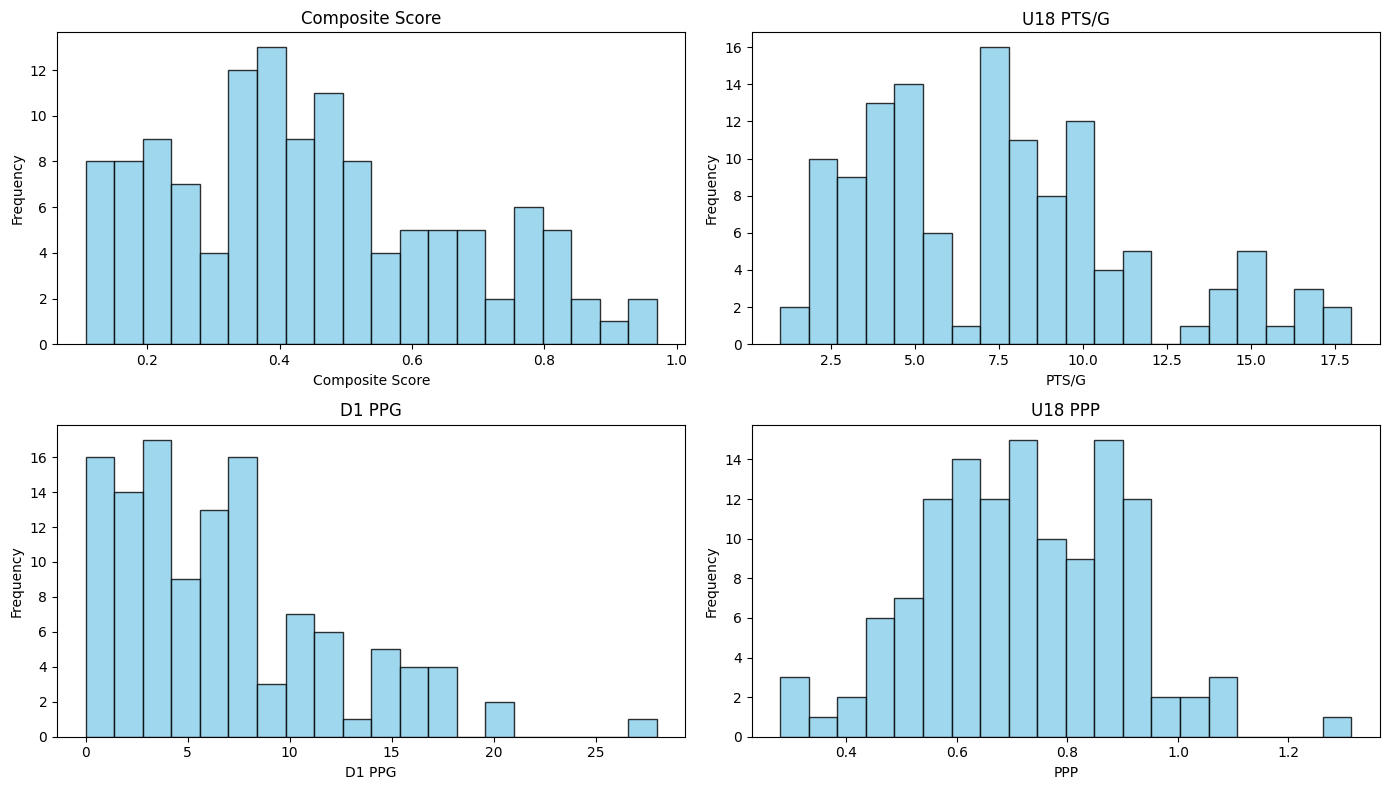

In [2]:
plt.figure(figsize=(14, 8))

columns = ['Composite Score', 'PTS/G', 'D1 PPG', 'PPP']
titles = ['Composite Score', 'U18 PTS/G', 'D1 PPG', 'U18 PPP']

for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
median_comp = df['Composite Score'].median()
# Plotting function
def plot_comparison(data, title):
    plt.figure(figsize=(12, 5))
    # Scatter: U18 PTS/G vs Composite Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='PTS/G', y='Composite Score', data=data)
    for i, row in data.iloc[::10].iterrows():  # Label every 7th player
        plt.text(row['PTS/G'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PTS/G vs Composite')
    
    # Scatter: U18 PPP vs Composite Score
    plt.subplot(1, 2, 2)
    sns.regplot(x='PPP', y='Composite Score', data=data)
    for i, row in data.iloc[::10].iterrows():
        plt.text(row['PPP'], row['Composite Score'], row['Player'], fontsize=8)
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title}: U18 PPP vs Composite')
    
    plt.tight_layout()
    plt.show()


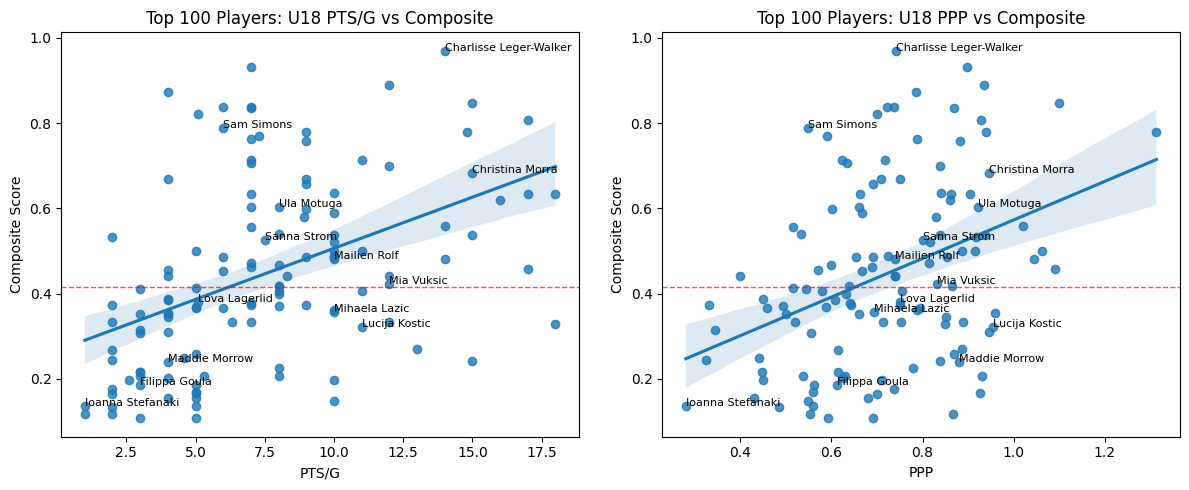

In [7]:

plot_comparison(df, 'Top 100 Players')


In [8]:
# Players with high Composite Score and low U18 PTS/G
low_ppg_high_median = df[(df['Composite Score'] > median_comp) & (df['PTS/G'] < 5)]
print(low_ppg_high_median[['Player','PTS/G','D1 School(s)','D1 PPG','Composite Score']].sort_values(by='Composite Score',ascending = False))

              Player  PTS/G    D1 School(s)  D1 PPG  Composite Score
3       Emme Shearer    4.0        Portland    17.0            0.872
21  Praise Egharevba    4.0        Oklahoma     NaN            0.670
39   Kobe King Hawea    2.0           Texas     4.0            0.533
55     Cynthia Ezeja    4.0             LMU     6.0            0.455
57    Felicia Dourva    4.0  Fresno Pacific    12.0            0.440


In [9]:
# Players with low Composite Score and low U18 PTS/G
low_ppg_low_median = df[(df['Composite Score'] < median_comp) & (df['PTS/G'] < 5)]
#print(len(low_ppg_low_median))
low_ppg_low_median[['Player','D1 School(s)','PTS/G','PPP','Composite Score','Country']].sort_values(by='Composite Score',ascending = False)

,Player,D1 School(s),PTS/G,PPP,Composite Score,Country
64,Silvia Nativi,Louisiana Tech,3.0,0.544,0.410,Italy
68,Sofia Persson,FGCU,4.0,0.449,0.388,Sweden
69,Lara Langermann,New Mexico,4.0,0.608,0.385,Germany
73,Anastasia Drosouni,Cal,2.0,0.330,0.373,Greece
81,Cheyenne Rowe,UTSA,4.0,0.960,0.355,Canada
82,Alice Curman,SIU,3.0,0.660,0.353,Sweden
83,Grace Hunter,CSUB,4.0,0.500,0.352,New Zealand
84,Kiandre Browne,Duquesne,4.0,0.852,0.345,Canada
85,Nina Horvath,East Texas A&M,2.0,0.714,0.333,Germany
91,Vanessa Taylor,Elon,3.0,0.344,0.315,Sweden


In [ ]:

# Print correlations
print("Top 100 Correlations:")
print(df[['PTS/G', 'PPP', 'D1 PPG']].corrwith(df['Composite Score']))


Top 100 Correlations:
PTS/G     0.456564
PPP       0.381996
D1 PPG    0.815090
dtype: float64


### I want to highlight these bad players. Give them a label and do a scatterplot.

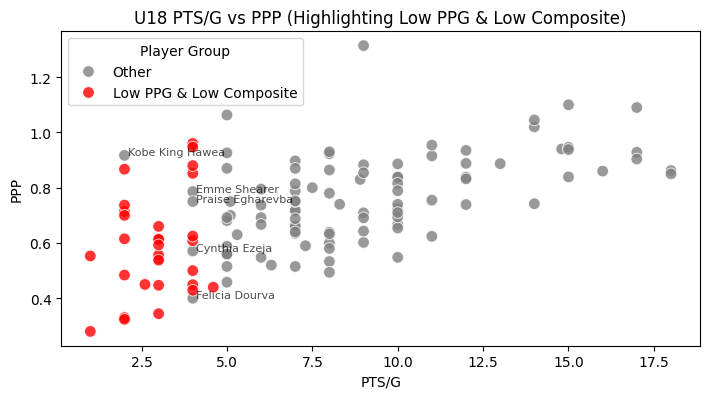

In [10]:
# Add a label column
df['Low Group'] = np.where(
    (df['Composite Score'] < median_comp) & (df['PTS/G'] < 5),
    'Low PPG & Low Composite',
    'Other'
)

plt.figure(figsize=(7.2, 4.1))
sns.scatterplot(
    data=df,
    x='PTS/G',
    y='PPP',
    hue='Low Group',
    palette={'Low PPG & Low Composite': 'red', 'Other': 'gray'},
    alpha=0.8,
    s=70
)
# Label players with PPG < 5 in the "Other" group
for _, row in df[(df['PTS/G'] < 5) & (df['Low Group'] == 'Other')].iterrows():
    plt.text(
        x=row['PTS/G'] + 0.1,  # Small offset to avoid overlap with point
        y=row['PPP'],
        s=row['Player'],
        fontsize=8,
        color='black',
        alpha=0.7
    )
plt.title('U18 PTS/G vs PPP (Highlighting Low PPG & Low Composite)')
plt.xlabel('PTS/G')
plt.ylabel('PPP')
plt.legend(title='Player Group')
plt.tight_layout()
plt.show()

# Now in Batches

In [ ]:
median_comp = df['Composite Score'].median()
def plot_comparison(data, title, start_idx, end_idx):
    plt.figure(figsize=(8, 4))
    
    
    # Scatter: U18 PTS/G vs Composite Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='PTS/G', y='Composite Score', data=data)
    
    # Add regression line separately to avoid confidence interval shading
    sns.regplot(x='PTS/G', y='Composite Score', data=data, 
                scatter=False, ci=None, line_kws={'color':'blue'})
    
    # Label all players in this subset
    for i, row in data.iterrows():
        plt.text(row['PTS/G'], row['Composite Score'], row['Player'], fontsize=8)
    
    # Add reference lines
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title} (Players {start_idx}-{end_idx}): U18 PPG vs Composite')
    
    # Scatter: U18 PPP vs Composite Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='PPP', y='Composite Score', data=data)
    sns.regplot(x='PPP', y='Composite Score', data=data, 
                scatter=False, ci=None, line_kws={'color':'blue'})
    
    for i, row in data.iterrows():
        plt.text(row['PPP'], row['Composite Score'], row['Player'], fontsize=8)
    
    plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.title(f'{title} (Players {start_idx}-{end_idx}): U18 PPP vs Composite')
    
    plt.tight_layout()
    plt.show()


## Synergy Role Analysis


Performance by Synergy Role:
                         PTS/G     PPP  D1 PPG  Composite Score  Count
Synergy Role                                                          
Spot Up Shooting Wing      6.0  0.7905     9.5           0.6700      8
Secondary Ball Handler     9.0  0.6920    13.0           0.6570      9
Slashing Wing              8.0  0.8390    10.0           0.5380     13
Dynamic Shooting Wing     10.0  0.8350     8.0           0.5275     10
Spot-up shooting wing      5.2  0.6650    11.0           0.5145      2
Playmaking Big            10.5  0.8570     7.3           0.5035      6
Post-Up Big                6.0  0.6715     6.0           0.4590      4
Rim Finishing Big          8.0  0.8830     4.0           0.4570      7
Post Up Big               10.5  0.9015     4.0           0.4360      6
Scoring Ball Handler      11.0  0.7800     8.0           0.4070      3
Slahing Wing               8.3  0.6430     1.5           0.3730      3
Playmaking Ball Handler    7.5  0.6615     7.5 

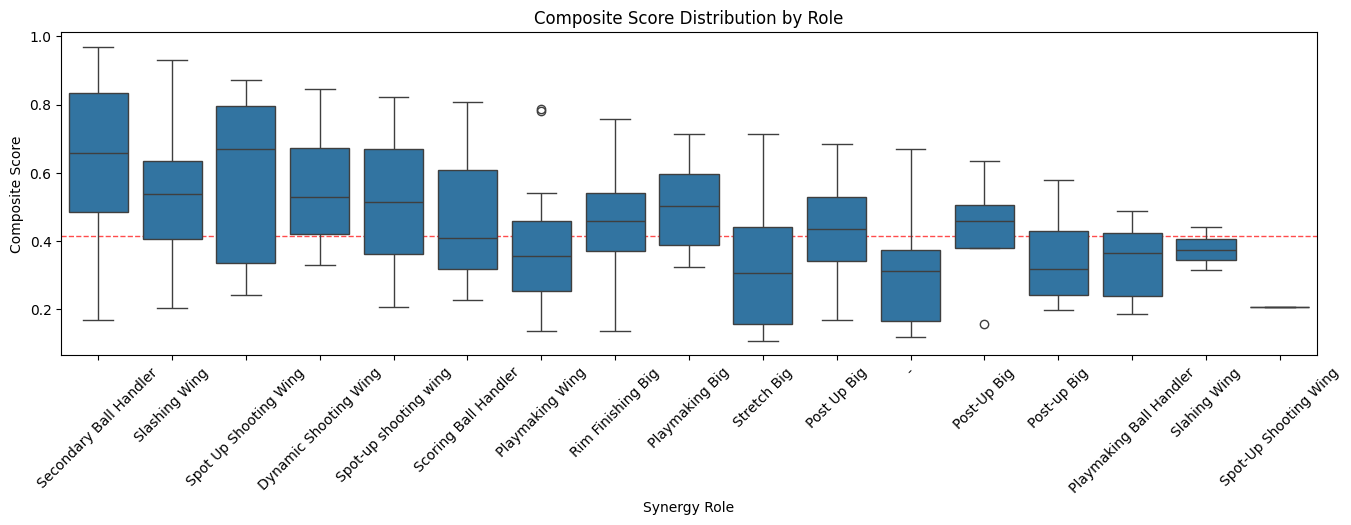

In [34]:
# Group by role and calculate medians
role_stats = df.groupby('Synergy Role').agg({
    'PTS/G': 'median',
    'PPP': 'median',
    'D1 PPG': 'median',
    'Composite Score': 'median',
    'Player': 'count'
}).rename(columns={'Player': 'Count'}).sort_values('Composite Score', ascending=False)

print("\nPerformance by Synergy Role:")
print(role_stats)

# Visualization
plt.figure(figsize=(16.2, 4.2))
plt.axhline(y=median_comp, color='red', linestyle='--', linewidth=1, alpha=0.7)
sns.boxplot(x='Synergy Role', y='Composite Score', data=df)
plt.xticks(rotation=45)
plt.title('Composite Score Distribution by Role')
plt.show()

# Fix the errors in roles (typos)

# height analyiss

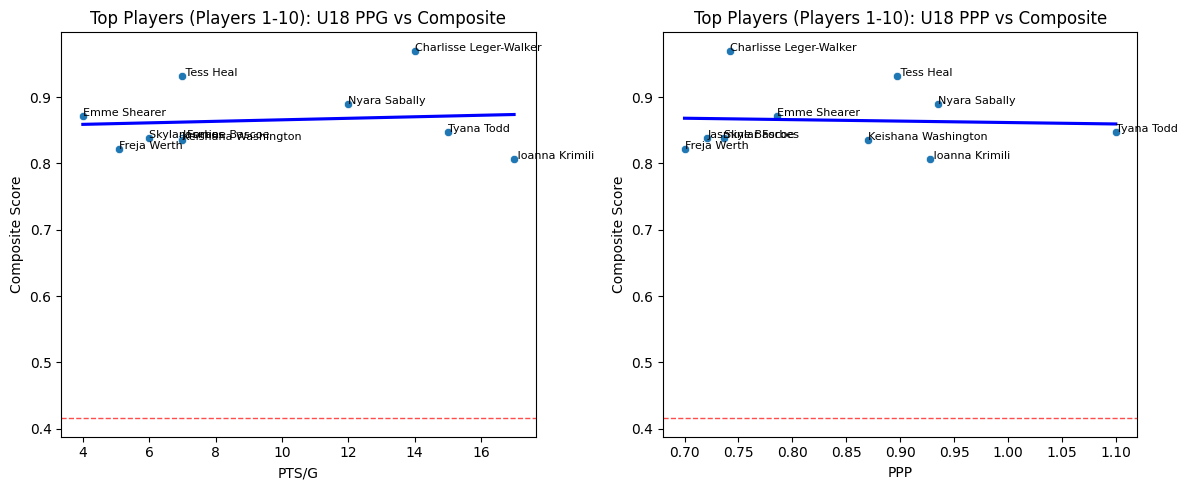

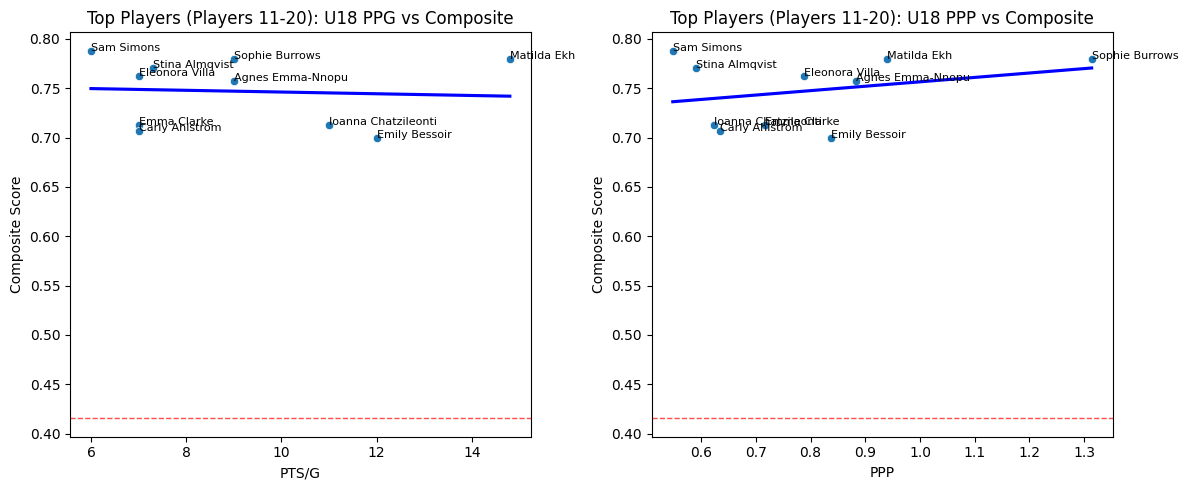

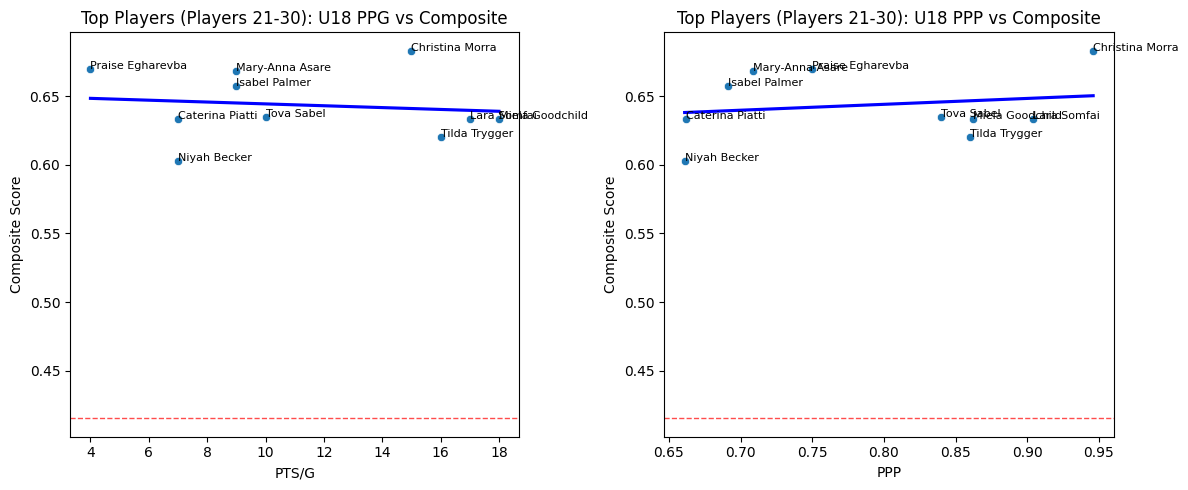

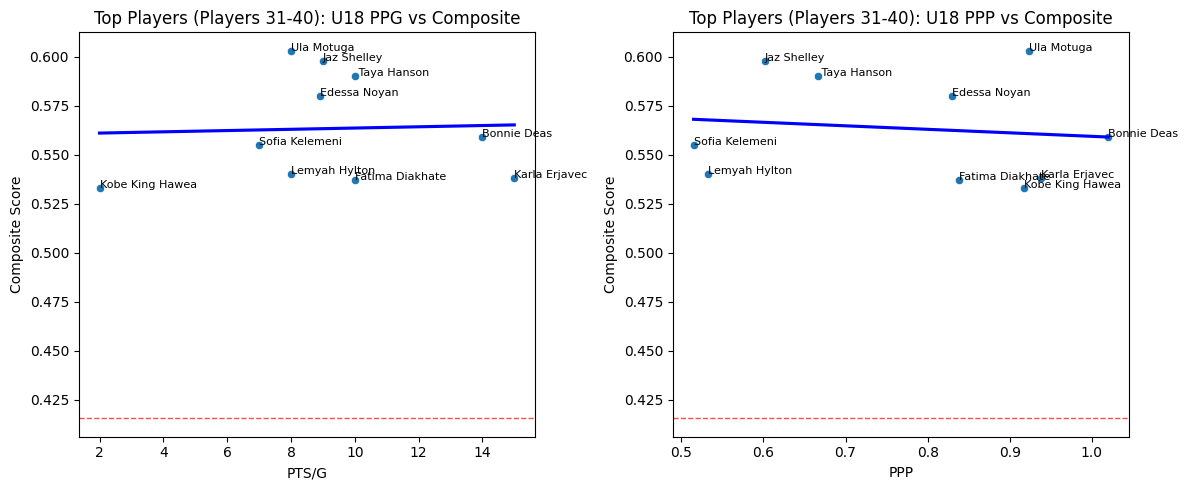

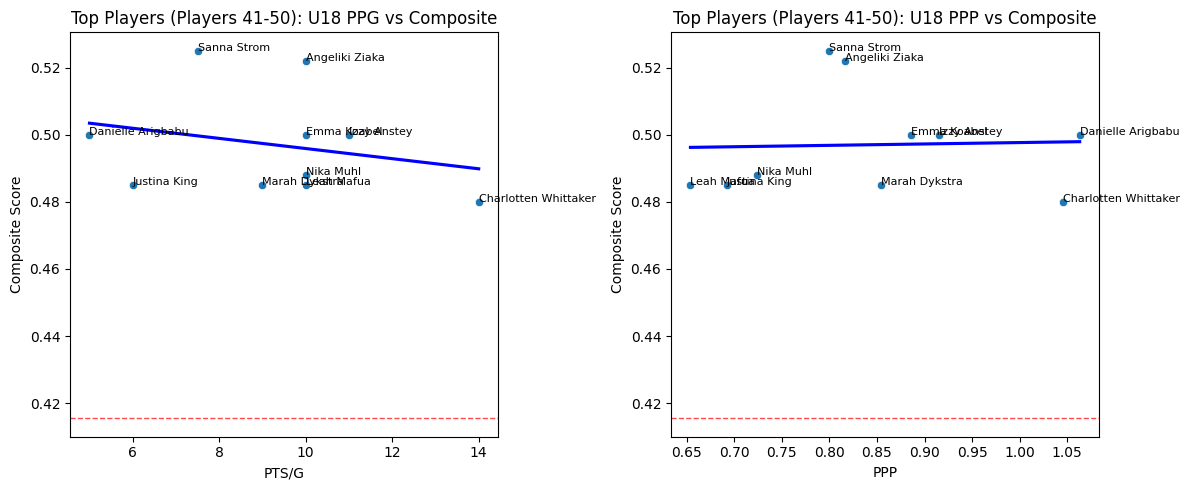

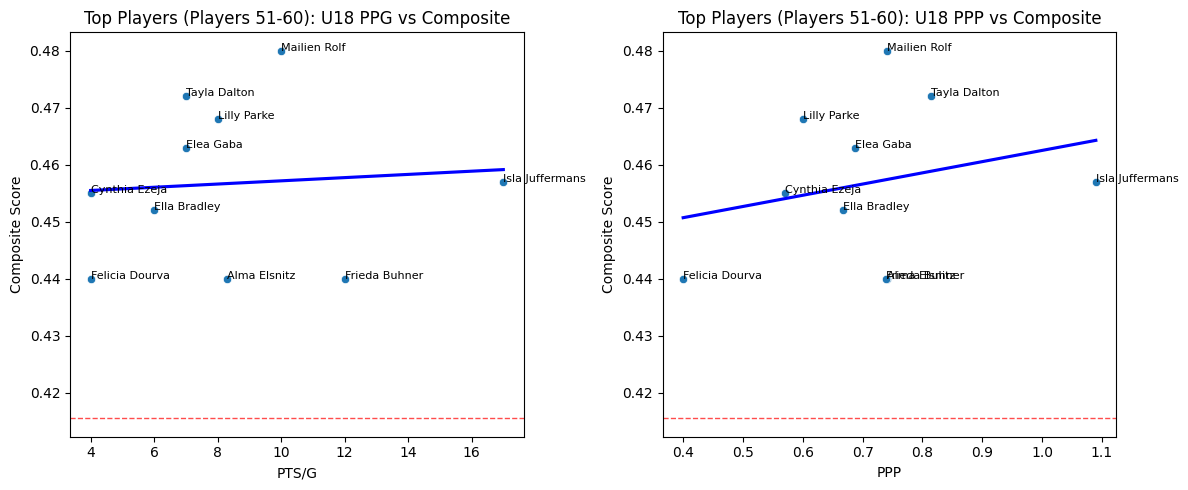

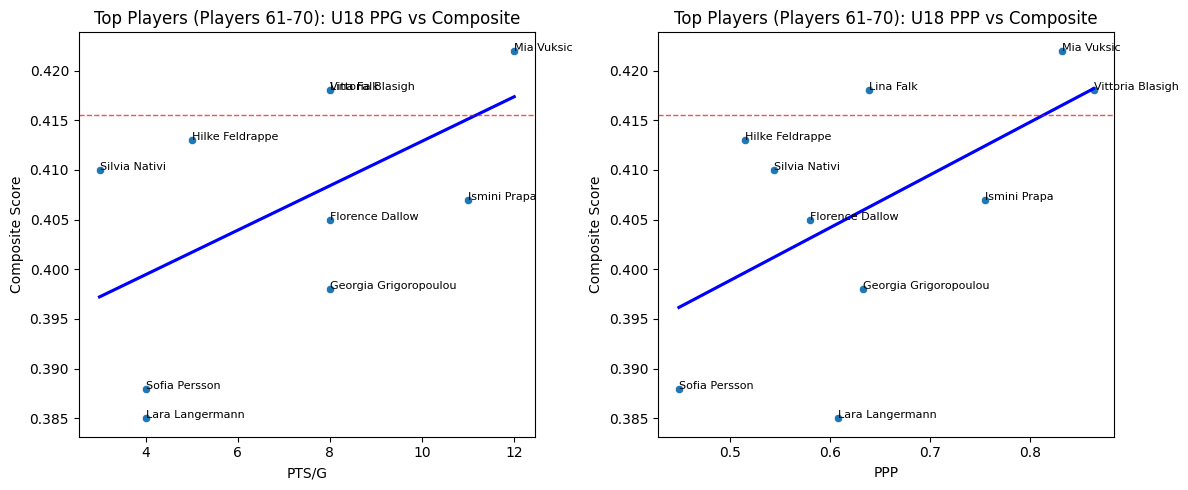

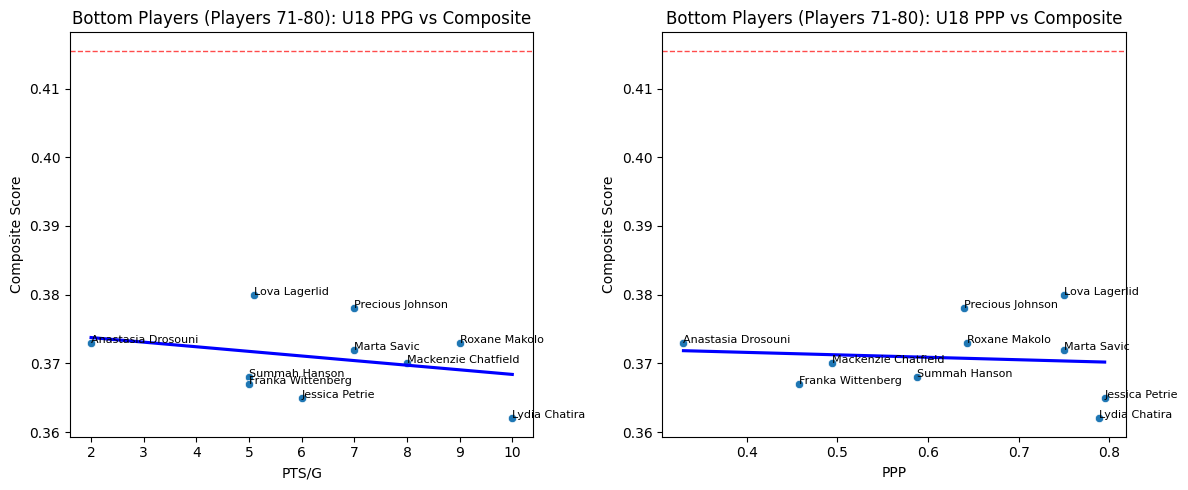

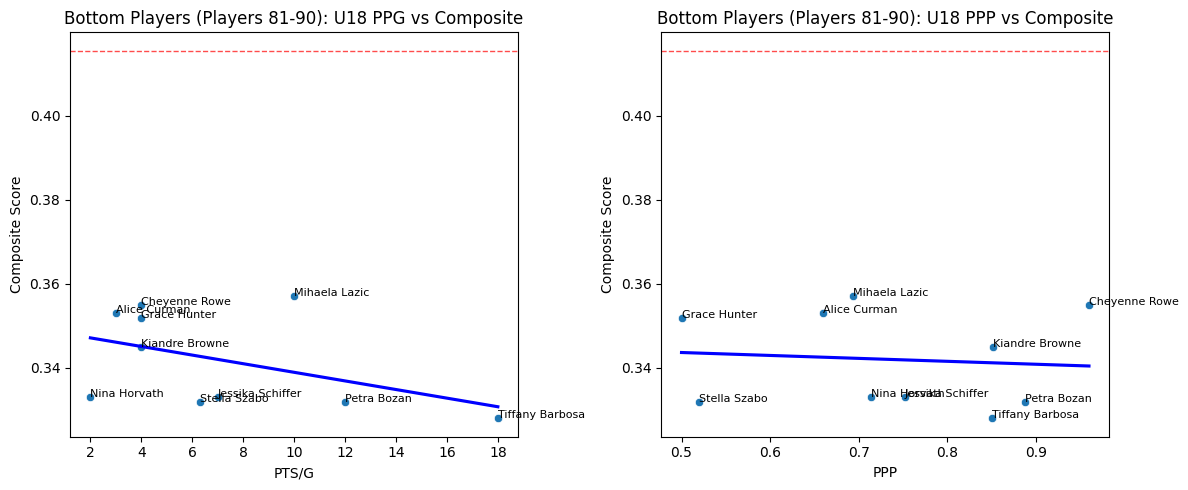

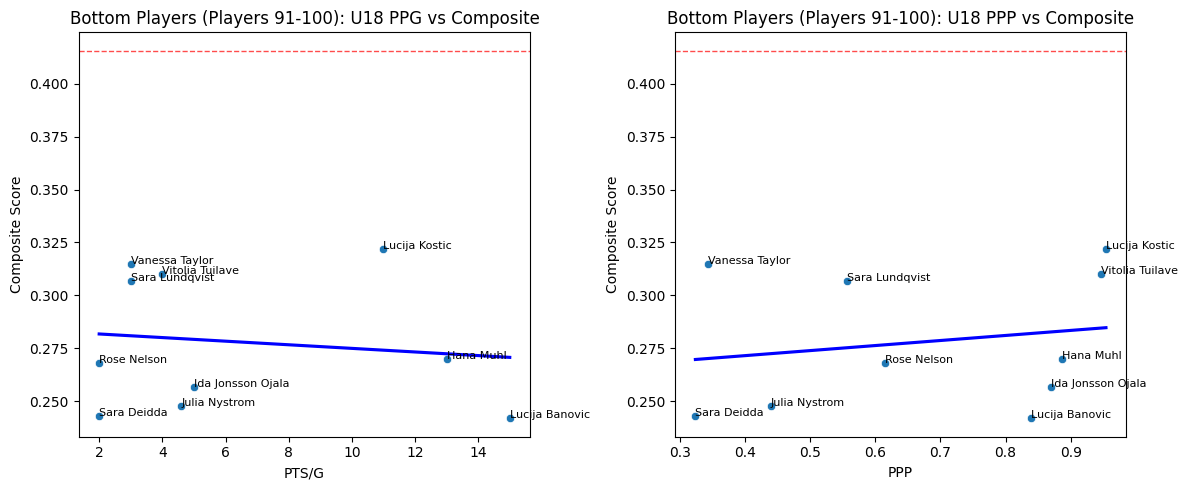

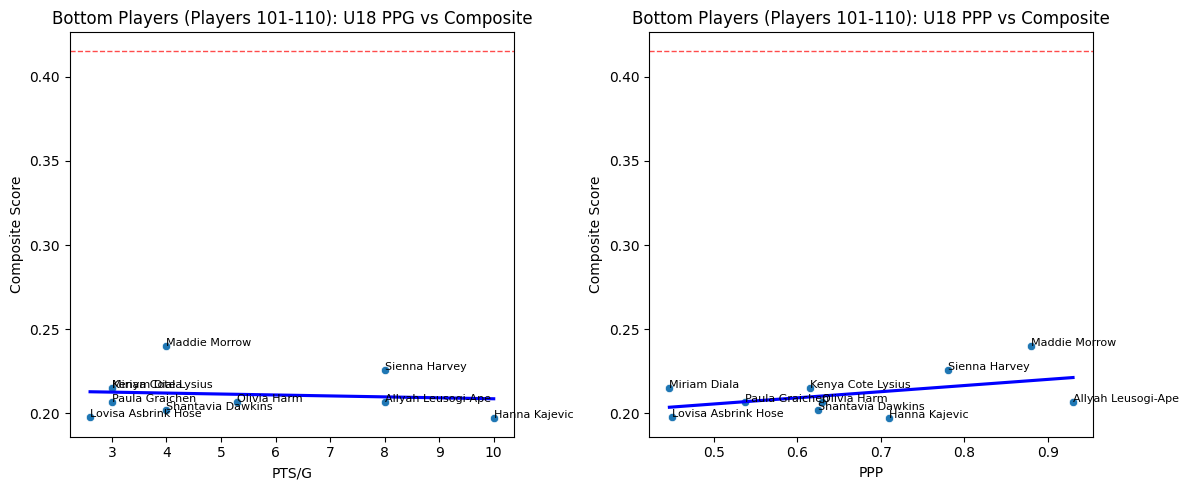

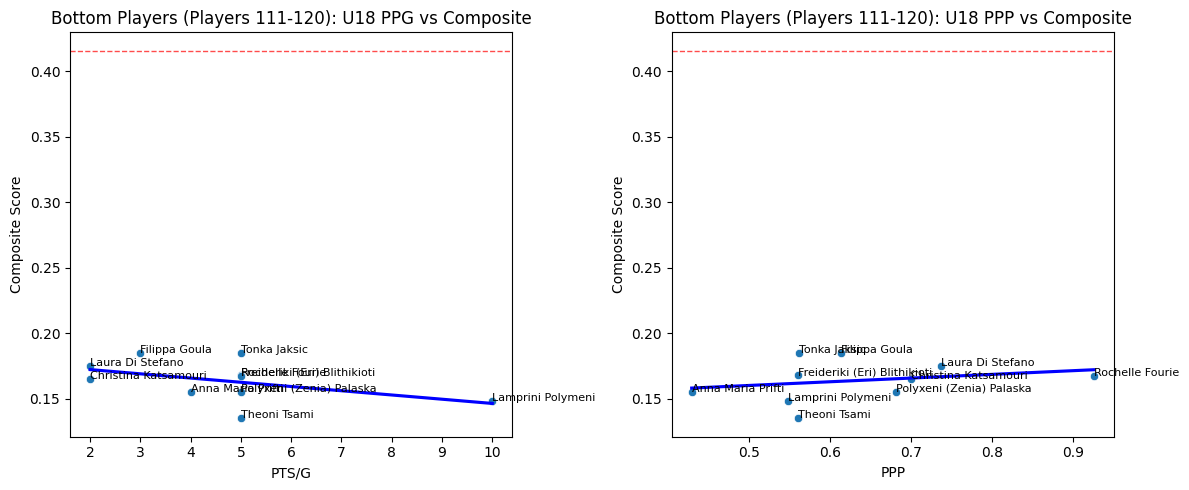

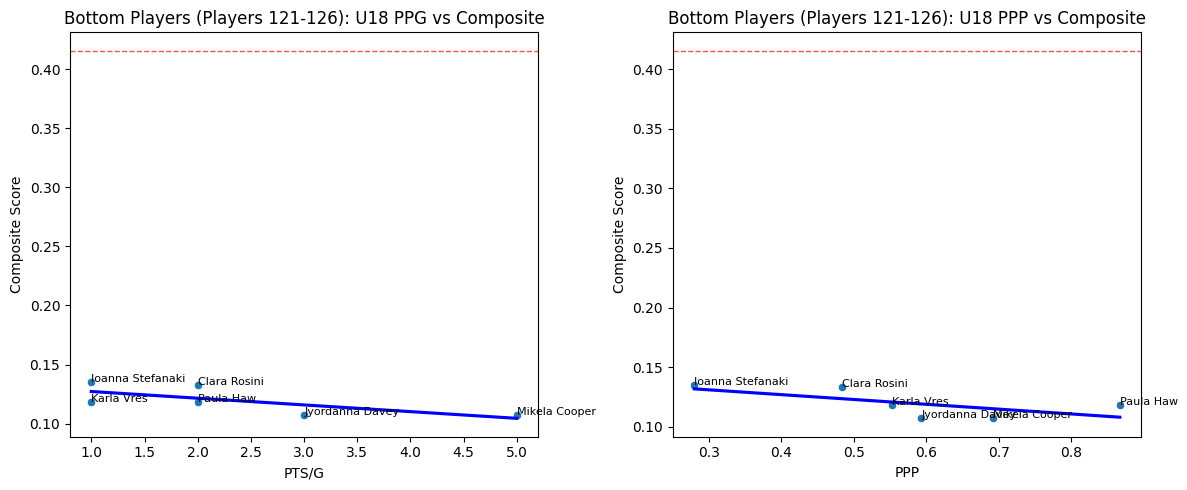

In [ ]:

# Sort the dataframe by composite score
df_sorted = df.sort_values('Composite Score', ascending=False).reset_index(drop=True)

# Generate plots in batches of 10
batch_size = 10
for i in range(0, len(df_sorted), batch_size):
    start_idx = i
    end_idx = min(i + batch_size, len(df_sorted))
    subset = df_sorted.iloc[start_idx:end_idx]
    
    if len(subset) > 0:
        position = "Top" if i < len(df_sorted)/2 else "Bottom"
        plot_comparison(subset, f'{position} Players', start_idx+1, end_idx)
        
        # Pause between plots (press any key to continue)
        input("Press enter button to view next 10 players...")
        plt.close()